In [ ]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 59.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
in_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/tempi-data-analysis/articles.csv/shorts/short_in_fa.csv")

In [ ]:
kath_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/tempi-data-analysis/articles.csv/shorts/short_kath_fa.csv")

In [ ]:
naft_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/tempi-data-analysis/articles.csv/shorts/short_naft_fa.csv")

In [ ]:
to_vima_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/tempi-data-analysis/articles.csv/shorts/short_to_vima_fa.csv")

In [ ]:
df=pd.concat([in_df, kath_df, naft_df, to_vima_df])

In [ ]:
df

date                                               text     site
0    2025-03-07  Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...       in
1    2025-03-07  Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...       in
2    2025-03-07  «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...       in
3    2025-03-07  Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...       in
4    2025-03-07  Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...       in
..          ...                                                ...      ...
191  2025-01-27  Λαοθάλασσα σχηματίστηκε χθες Κυριακή 26/1 σε ό...  to vima
192  2025-01-26  Σύμφωνα με πληροφορίες, ο πρόεδρος του ΣΥΡΙΖΑ,...  to vima
193  2025-01-26  Σε συνεννόηση με τους αρχηγούς όλων των άλλων ...  to vima
194  2025-01-26  Ανακοίνωση εξέδωσε η ΕΛΑΣ σχετικά με τη μεγάλη...  to vima
195  2025-01-26  Πολυπληθείς διαδηλώσεις για τα θύματα στα Τέμπ...  to vima

[1126 rows x 3 columns]

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df

date                                               text     site
0     2025-03-07  Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...       in
1     2025-03-07  Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...       in
2     2025-03-07  «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...       in
3     2025-03-07  Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...       in
4     2025-03-07  Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...       in
...          ...                                                ...      ...
1121  2025-01-27  Λαοθάλασσα σχηματίστηκε χθες Κυριακή 26/1 σε ό...  to vima
1122  2025-01-26  Σύμφωνα με πληροφορίες, ο πρόεδρος του ΣΥΡΙΖΑ,...  to vima
1123  2025-01-26  Σε συνεννόηση με τους αρχηγούς όλων των άλλων ...  to vima
1124  2025-01-26  Ανακοίνωση εξέδωσε η ΕΛΑΣ σχετικά με τη μεγάλη...  to vima
1125  2025-01-26  Πολυπληθείς διαδηλώσεις για τα θύματα στα Τέμπ...  to vima

[1126 rows x 3 columns]

In [ ]:
df.drop_duplicates()
df.dropna(subset='text')

date                                               text     site
0    2025-03-07  Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...       in
1    2025-03-07  Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...       in
2    2025-03-07  «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...       in
3    2025-03-07  Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...       in
4    2025-03-07  Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...       in
...         ...                                                ...      ...
1121 2025-01-27  Λαοθάλασσα σχηματίστηκε χθες Κυριακή 26/1 σε ό...  to vima
1122 2025-01-26  Σύμφωνα με πληροφορίες, ο πρόεδρος του ΣΥΡΙΖΑ,...  to vima
1123 2025-01-26  Σε συνεννόηση με τους αρχηγούς όλων των άλλων ...  to vima
1124 2025-01-26  Ανακοίνωση εξέδωσε η ΕΛΑΣ σχετικά με τη μεγάλη...  to vima
1125 2025-01-26  Πολυπληθείς διαδηλώσεις για τα θύματα στα Τέμπ...  to vima

[1124 rows x 3 columns]

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [ ]:
df.dtypes

date    datetime64[ns]
text            object
site            object
dtype: object

In [ ]:
df['text'] = df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
df = df.dropna(subset=['text'])


In [ ]:
matrix = vec.fit_transform(df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    1     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [ ]:
wordcount_df.shape

(1124, 13161)

In [ ]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
angry_words = emolex_df[emolex_df.Anger == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
wordcount_df[trust_words].sum(axis=1)

0        7
1       27
2       17
3       13
4        8
        ..
1119    42
1120    14
1121    55
1122    31
1123    20
Length: 1124, dtype: int64

In [ ]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positive'] = wordcount_df[positive_words].sum(axis=1)

df['joy'] = wordcount_df[joy_words].sum(axis=1)

df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)

df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

<ipython-input-43-3881372290>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-43-3881372290>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-43-3881372290>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [ ]:
df

date                                               text     site  \
0    2025-03-07  Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...       in   
1    2025-03-07  Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...       in   
2    2025-03-07  «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...       in   
3    2025-03-07  Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...       in   
4    2025-03-07  Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...       in   
...         ...                                                ...      ...   
1121 2025-01-27  Λαοθάλασσα σχηματίστηκε χθες Κυριακή 26/1 σε ό...  to vima   
1122 2025-01-26  Σύμφωνα με πληροφορίες, ο πρόεδρος του ΣΥΡΙΖΑ,...  to vima   
1123 2025-01-26  Σε συνεννόηση με τους αρχηγούς όλων των άλλων ...  to vima   
1124 2025-01-26  Ανακοίνωση εξέδωσε η ΕΛΑΣ σχετικά με τη μεγάλη...  to vima   
1125 2025-01-26  Πολυπληθείς διαδηλώσεις για τα θύματα στα Τέμπ...  to vima   

      anger  positive   joy  disgust  surprise  trust  anticipation  sadness  \
0       3.0       8.0   2.0      0.0       0.0    7.0           2.0      7.0   
1      21.0      33.0   5.0      9.0      14.0   27.0           7.0     18.0   
2      10.0      21.0   1.0      5.0       1.0   17.0           5.0      6.0   
3      10.0      23.0   1.0     10.0       6.0   13.0          10.0      8.0   
4       4.0       6.0   1.0      1.0       3.0    8.0           5.0      5.0   
...     ...       ...   ...      ...       ...    ...           ...      ...   
1121   73.0      85.0   4.0     21.0      14.0   55.0          47.0     56.0   
1122    6.0      29.0  24.0     18.0      35.0   31.0          34.0     24.0   
1123   23.0      28.0   4.0     11.0       0.0   20.0          32.0      8.0   
1124    NaN       NaN   NaN      NaN       NaN    NaN           NaN      NaN   
1125    NaN       NaN   NaN      NaN       NaN    NaN           NaN      NaN   

      negative  fear  
0          7.0   5.0  
1         44.0  33.0  
2         17.0  12.0  
3         20.0  17.0  
4          8.0   4.0  
...        ...   ...  
1121     128.0  91.0  
1122      50.0  42.0  
1123      30.0  15.0  
1124       NaN   NaN  
1125       NaN   NaN  

[1124 rows x 13 columns]

In [ ]:
df.dropna(inplace=True)
df

<ipython-input-45-955798070>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


date                                               text     site  \
0    2025-03-07  Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...       in   
1    2025-03-07  Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...       in   
2    2025-03-07  «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...       in   
3    2025-03-07  Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...       in   
4    2025-03-07  Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...       in   
...         ...                                                ...      ...   
1119 2025-01-27  Το ΚΚΕ κατέθεσε αίτημα προς τον πρόεδρο της Βο...  to vima   
1120 2025-01-27  Οι χθεσινές μαζικές συγκεντρώσεις για τα Τέμπη...  to vima   
1121 2025-01-27  Λαοθάλασσα σχηματίστηκε χθες Κυριακή 26/1 σε ό...  to vima   
1122 2025-01-26  Σύμφωνα με πληροφορίες, ο πρόεδρος του ΣΥΡΙΖΑ,...  to vima   
1123 2025-01-26  Σε συνεννόηση με τους αρχηγούς όλων των άλλων ...  to vima   

      anger  positive   joy  disgust  surprise  trust  anticipation  sadness  \
0       3.0       8.0   2.0      0.0       0.0    7.0           2.0      7.0   
1      21.0      33.0   5.0      9.0      14.0   27.0           7.0     18.0   
2      10.0      21.0   1.0      5.0       1.0   17.0           5.0      6.0   
3      10.0      23.0   1.0     10.0       6.0   13.0          10.0      8.0   
4       4.0       6.0   1.0      1.0       3.0    8.0           5.0      5.0   
...     ...       ...   ...      ...       ...    ...           ...      ...   
1119   46.0      64.0  30.0     28.0      19.0   42.0          18.0     13.0   
1120   29.0      35.0   4.0      8.0       0.0   14.0          22.0      2.0   
1121   73.0      85.0   4.0     21.0      14.0   55.0          47.0     56.0   
1122    6.0      29.0  24.0     18.0      35.0   31.0          34.0     24.0   
1123   23.0      28.0   4.0     11.0       0.0   20.0          32.0      8.0   

      negative  fear  
0          7.0   5.0  
1         44.0  33.0  
2         17.0  12.0  
3         20.0  17.0  
4          8.0   4.0  
...        ...   ...  
1119      66.0  25.0  
1120      50.0   5.0  
1121     128.0  91.0  
1122      50.0  42.0  
1123      30.0  15.0  

[1106 rows x 13 columns]

In [ ]:
df.reset_index(inplace=True)
df.set_index('date', inplace=True)
df

index                                               text     site  \
date                                                                            
2025-03-07      0  Συγκλονιστική στιγμή στο σημερινό συλλαλητήριο...       in   
2025-03-07      1  Τον γύρο του κόσμου κάνει η συζήτηση στη Βουλή...       in   
2025-03-07      2  «Ο πρωθυπουργός», τόνισε ο Αλέξης Χαρίτσης στη...       in   
2025-03-07      3  Δύο χρόνια μετά βρέθηκε στη Λάρισα το κλιμάκιο...       in   
2025-03-07      4  Στις μεγάλες διαδηλώσεις που απαίτησαν δικαιοσ...       in   
...           ...                                                ...      ...   
2025-01-27   1119  Το ΚΚΕ κατέθεσε αίτημα προς τον πρόεδρο της Βο...  to vima   
2025-01-27   1120  Οι χθεσινές μαζικές συγκεντρώσεις για τα Τέμπη...  to vima   
2025-01-27   1121  Λαοθάλασσα σχηματίστηκε χθες Κυριακή 26/1 σε ό...  to vima   
2025-01-26   1122  Σύμφωνα με πληροφορίες, ο πρόεδρος του ΣΥΡΙΖΑ,...  to vima   
2025-01-26   1123  Σε συνεννόηση με τους αρχηγούς όλων των άλλων ...  to vima   

            anger  positive   joy  disgust  surprise  trust  anticipation  \
date                                                                        
2025-03-07    3.0       8.0   2.0      0.0       0.0    7.0           2.0   
2025-03-07   21.0      33.0   5.0      9.0      14.0   27.0           7.0   
2025-03-07   10.0      21.0   1.0      5.0       1.0   17.0           5.0   
2025-03-07   10.0      23.0   1.0     10.0       6.0   13.0          10.0   
2025-03-07    4.0       6.0   1.0      1.0       3.0    8.0           5.0   
...           ...       ...   ...      ...       ...    ...           ...   
2025-01-27   46.0      64.0  30.0     28.0      19.0   42.0          18.0   
2025-01-27   29.0      35.0   4.0      8.0       0.0   14.0          22.0   
2025-01-27   73.0      85.0   4.0     21.0      14.0   55.0          47.0   
2025-01-26    6.0      29.0  24.0     18.0      35.0   31.0          34.0   
2025-01-26   23.0      28.0   4.0     11.0       0.0   20.0          32.0   

            sadness  negative  fear  
date                                 
2025-03-07      7.0       7.0   5.0  
2025-03-07     18.0      44.0  33.0  
2025-03-07      6.0      17.0  12.0  
2025-03-07      8.0      20.0  17.0  
2025-03-07      5.0       8.0   4.0  
...             ...       ...   ...  
2025-01-27     13.0      66.0  25.0  
2025-01-27      2.0      50.0   5.0  
2025-01-27     56.0     128.0  91.0  
2025-01-26     24.0      50.0  42.0  
2025-01-26      8.0      30.0  15.0  

[1106 rows x 13 columns]

<Axes: xlabel='date'>

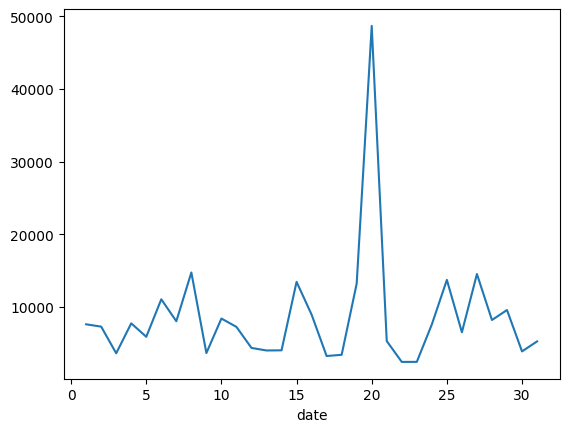

In [ ]:
df['text'].str.len().groupby(by=df.index.day).mean().plot()

<Axes: xlabel='date'>

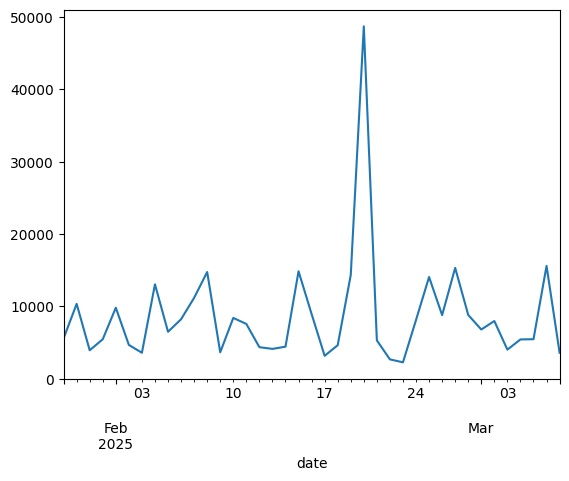

In [ ]:
df = df.sort_index()
df= df.loc['2025-01-28':'2025-03-7']
df['text'].str.len().resample('D').mean().plot()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
plt.style.use('seaborn-v0_8-bright')

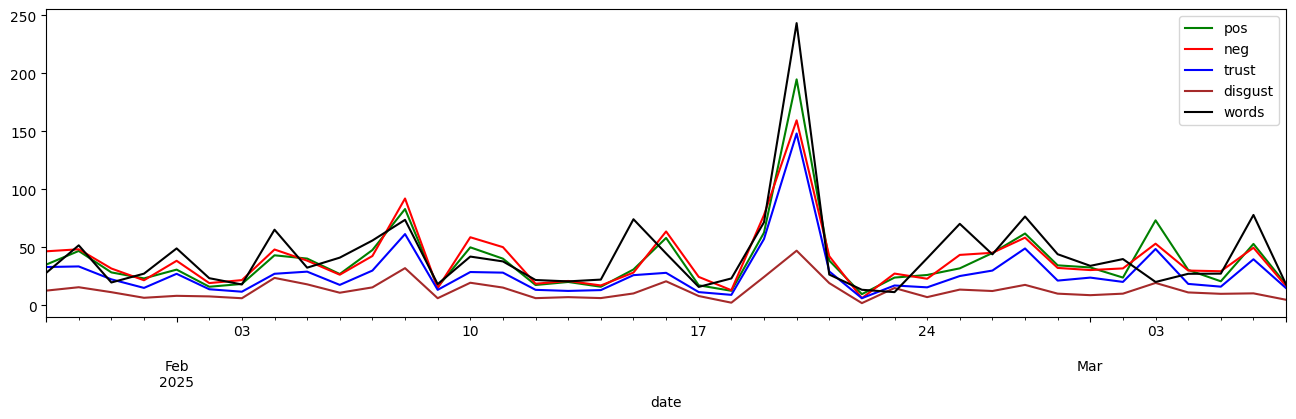

In [ ]:
ax =df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax,
                                                label = 'words',color = 'black').legend()

In [ ]:
print(df['site'].unique())


['kathimerini' 'to vima' 'in' 'naftemporiki']


In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

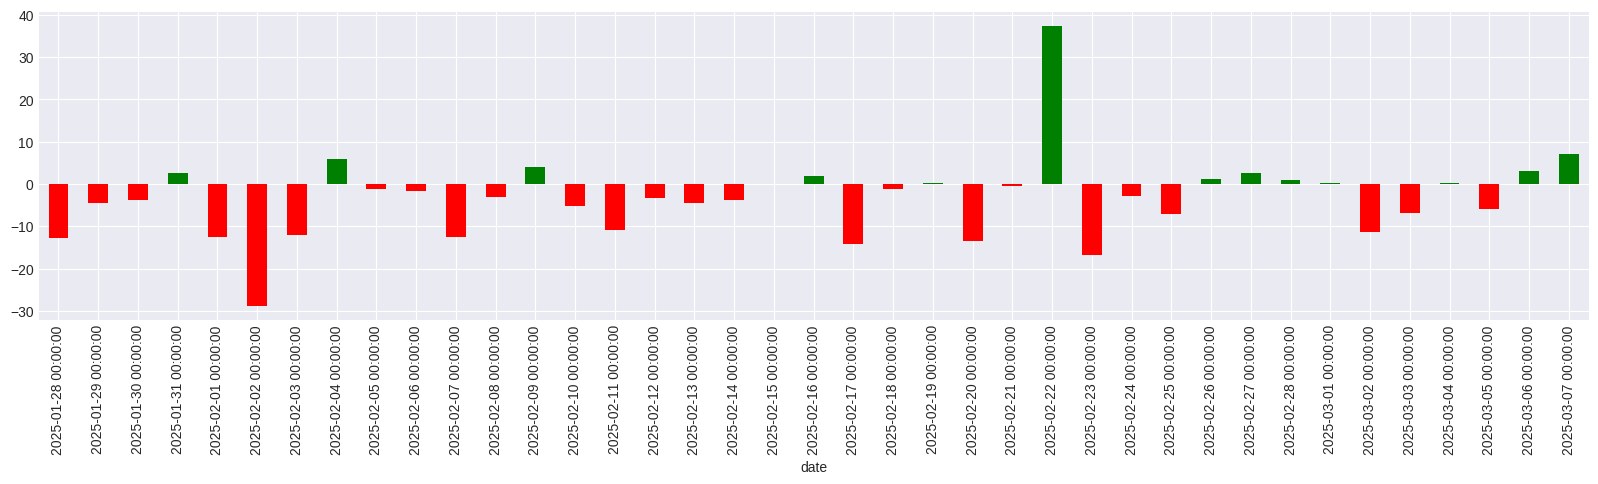

In [ ]:
df['(-)αρνητικότητα | θετικότητα(+)'] = df.positive*100//df[['positive','negative']].sum(
        axis=1) - df.negative*100//df[['positive','negative']].sum(axis=1)

df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(20,4))

In [ ]:
df[(df['(-)αρνητικότητα | θετικότητα(+)'] == df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (df['(-)αρνητικότητα | θετικότητα(+)'] == df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

index  positive  negative  (-)αρνητικότητα | θετικότητα(+)
date                                                                  
2025-01-30    322       0.0       2.0                           -100.0
2025-02-02    836       0.0       1.0                           -100.0
2025-02-04    826       3.0       0.0                            100.0
2025-02-05   1074       0.0       4.0                           -100.0
2025-02-06    809       0.0       1.0                           -100.0
2025-02-07    799       0.0       5.0                           -100.0
2025-02-08    794       0.0       2.0                           -100.0
2025-02-19    501       1.0       0.0                            100.0
2025-02-20   1030       0.0       8.0                           -100.0
2025-02-20    748       0.0       1.0                           -100.0
2025-02-22    740       1.0       0.0                            100.0
2025-02-24    731       0.0       1.0                           -100.0
2025-02-24    733       0.0       1.0                           -100.0
2025-02-25    721       0.0       2.0                           -100.0
2025-02-25    719       0.0       3.0                           -100.0
2025-02-25    482       0.0       5.0                           -100.0
2025-02-25    154       8.0       0.0                            100.0
2025-02-26    704       0.0       1.0                           -100.0
2025-02-26    701       0.0       1.0                           -100.0
2025-02-27    697       2.0       0.0                            100.0
2025-02-28    677       0.0       3.0                           -100.0
2025-02-28    662       0.0       2.0                           -100.0
2025-02-28    652       1.0       0.0                            100.0
2025-02-28    666       2.0       0.0                            100.0
2025-02-28    648       2.0       0.0                            100.0
2025-02-28     86       0.0       1.0                           -100.0
2025-02-28    643       1.0       0.0                            100.0
2025-02-28     98       0.0       4.0                           -100.0
2025-03-01    638       0.0       4.0                           -100.0
2025-03-05    395       0.0       1.0                           -100.0
2025-03-07      8       4.0       0.0                            100.0

In [ ]:
df[df['index'].isin([826,501,740,697, 643, 666, 652,666,648, 740, 8])][['text', 'site']]


text          site
date                                                                       
2025-02-04  Αναφερόμενος στα πορίσματα, τόσο από το Πανεπι...  naftemporiki
2025-02-19  Τις απόψεις των πολιτών σχετικά με τη διερεύνη...   kathimerini
2025-02-22  Στις 28 του μήνα συμπληρώνονται δύο χρόνια από...  naftemporiki
2025-02-27  Τάδε έφη ο Γουόρεν Μπάφετ, σαν σήμερα, 27 Φεβρ...  naftemporiki
2025-02-28  Συγκεκριμένα, σύμφωνα με ενημέρωση από την 1η ...  naftemporiki
2025-02-28  Τα ΜΑΤ απαντούν με χημικά, ενώ ο κόσμος τρέχει...  naftemporiki
2025-02-28  Με ασθενοφόρα του ΕΚΑΒ διακομίστηκαν 23 άνθρωπ...  naftemporiki
2025-02-28  Στα επεισόδια τραυματίστηκαν 29 αστυνομικοί, ε...  naftemporiki
2025-03-07  Ραντεβού στο άγαλμα του Βενιζέλου, στο κέντρο ...            in

In [ ]:
df[df['index'].isin([322,836,1074,799, 677, 662, 86,395])][['text', 'site']]


text          site
date                                                                       
2025-01-30  Έντονα αντέδρασε ο εκπρόσωπος Τύπου του ΣΥΡΙΖΑ...            in
2025-02-02  Μάλιστα, καθιστά σαφές ότι παραμένει προσηλωμέ...  naftemporiki
2025-02-05  Αποδεκτή κάνει η Νέα Δημοκρατία την πρόταση το...       to vima
2025-02-07  «Αυτοί οι αγώνες είναι που έχουν στριμώξει την...  naftemporiki
2025-02-28   «Δυο χρόνια πέρασαν από τη νύχτα της 28ης Φεβ...  naftemporiki
2025-02-28  Στην κεντρική συγκέντρωση, στο άγαλμα του Βενι...  naftemporiki
2025-02-28  Διαδηλώσεις στη μνήμη των 57 θυμάτων της τραγω...            in
2025-03-05  Αγνωστοι επιτέθηκαν με πέτρες στον σιδηροδρομι...   kathimerini

In [ ]:
df[['positive', 'negative', 'trust', 'disgust']].corr()

positive  negative     trust   disgust
positive  1.000000  0.947495  0.962490  0.887595
negative  0.947495  1.000000  0.935010  0.941059
trust     0.962490  0.935010  1.000000  0.864933
disgust   0.887595  0.941059  0.864933  1.000000

In [ ]:
sites = df['site'].unique()

for site in sites:
    df_site = df[df['site'] == site]
    corr = df_site[['positive', 'negative', 'trust', 'disgust']].corr()
    print(f"{site}")
    print(corr, "\n")

kathimerini
          positive  negative     trust   disgust
positive  1.000000  0.928849  0.956077  0.848161
negative  0.928849  1.000000  0.932217  0.893293
trust     0.956077  0.932217  1.000000  0.832644
disgust   0.848161  0.893293  0.832644  1.000000 

to vima
          positive  negative     trust   disgust
positive  1.000000  0.935570  0.956830  0.863221
negative  0.935570  1.000000  0.925236  0.928829
trust     0.956830  0.925236  1.000000  0.841127
disgust   0.863221  0.928829  0.841127  1.000000 

in
          positive  negative     trust   disgust
positive  1.000000  0.843697  0.904455  0.708383
negative  0.843697  1.000000  0.800857  0.773454
trust     0.904455  0.800857  1.000000  0.656884
disgust   0.708383  0.773454  0.656884  1.000000 

naftemporiki
          positive  negative     trust   disgust
positive  1.000000  0.901381  0.936692  0.808068
negative  0.901381  1.000000  0.901820  0.828276
trust     0.936692  0.901820  1.000000  0.773738
disgust   0.808068  0.82827

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

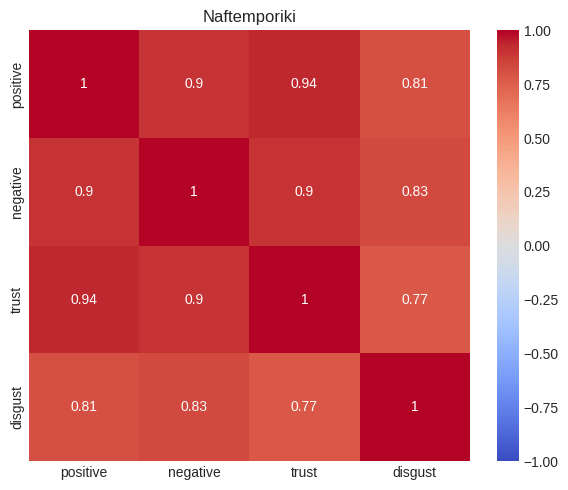

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f"{site.capitalize()}")
plt.tight_layout()
plt.show()